In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
files = []
file_paths = []
for dirname, _, filenames in os.walk('/kaggle/input/egyptian-hieroglyphics-datasets/images/Train'):
    for filename in filenames:
        if filename.endswith(".jpg"):
            files.append(filename)
            file_paths.append(os.path.join(dirname, filename))
            
print(len(files))
label = []
labels = []
for f in files:
#     print(f)
    label.append(f.split('('))
    
for i in label:
    labels.append(i[0].rstrip())

labels

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

3890


['to protect',
 'one',
 'you',
 'limits',
 'one',
 'galena',
 'giraffe',
 'falcon',
 'at',
 'to protect',
 'fingre',
 'fingre',
 'foot',
 'pool',
 'cloth on pole',
 'face',
 'musical instrument',
 'birth',
 'to protect',
 'aroura',
 'quailchick',
 'brewer',
 'aroura',
 'reed',
 'hit',
 'elephant',
 'angry',
 'fish',
 'corpse',
 'musical instrument',
 '100',
 'aroura',
 'loaf of bread',
 'leg',
 'you',
 'life spirit',
 'lion',
 'bandage',
 'pair',
 'cobra',
 'loaf of bread',
 'mascot',
 'bee',
 'sail',
 'mouth',
 'water',
 'composite_bow',
 'occur',
 'flail',
 'this',
 'cloth on pole',
 'water',
 'sandal',
 'papyrus scroll',
 'cobra',
 'papyrus scroll',
 'leg',
 'meet',
 'limits',
 'among',
 'horn',
 'sail',
 'man',
 'horn',
 'sail',
 'branch',
 'mother',
 'now',
 'pool',
 'corpse',
 'lion',
 'sail',
 'folded',
 'wall',
 'sail',
 'birth',
 'you',
 'to be dead',
 'fingre',
 'Woman',
 'horn',
 'stick',
 'book',
 'you',
 'man',
 'swallow',
 'star',
 'rope',
 'reed',
 'belongs',
 'galena',


In [46]:
import numpy as np
labels = np.array(labels)
unique_symbols = np.unique(labels)
len(unique_symbols)

95

In [47]:
boolean_labels = [label == unique_symbols for label in labels]
len(boolean_labels)

3890

In [48]:
#example turning boolean array into integers
print(labels[0]) #original label
print(np.where(unique_symbols == labels[0])) #index at which it occurs
print(boolean_labels[0].argmax()) #index at which it occurs
print(boolean_labels[0].astype(int)) #index at which it occurs

to protect
(array([88]),)
88
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [64]:
#Set up X & y variables
X = file_paths
y = boolean_labels
print(len(X), len(y))

3890 3890


In [65]:
NUM_IMAGES = 1000

In [66]:
#Let's split our data into train and validation set
from sklearn.model_selection import train_test_split

#Slipt them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state=42)# seed
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [67]:
X_train[:5], y_train[:2]

(['/kaggle/input/egyptian-hieroglyphics-datasets/images/Train/musical instrument (4).jpg',
  '/kaggle/input/egyptian-hieroglyphics-datasets/images/Train/limits (27).jpg',
  '/kaggle/input/egyptian-hieroglyphics-datasets/images/Train/nurse(25).jpg',
  '/kaggle/input/egyptian-hieroglyphics-datasets/images/Train/lizard(36).jpg',
  '/kaggle/input/egyptian-hieroglyphics-datasets/images/Train/face (3).jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False,  True, False, False,
         False, False, False, False, False, False, False, False, False,
         False, Fa

In [68]:
#convert an image into a numpy array
from matplotlib.pyplot import imread
image = imread(file_paths[42])

In [69]:
tf.constant(image)

<tf.Tensor: shape=(660, 770, 3), dtype=uint8, numpy=
array([[[250, 214, 138],
        [250, 214, 138],
        [250, 214, 138],
        ...,
        [250, 214, 138],
        [250, 214, 138],
        [250, 214, 138]],

       [[250, 214, 138],
        [250, 214, 138],
        [250, 214, 138],
        ...,
        [250, 214, 138],
        [250, 214, 138],
        [250, 214, 138]],

       [[250, 214, 138],
        [250, 214, 138],
        [250, 214, 138],
        ...,
        [250, 214, 138],
        [250, 214, 138],
        [250, 214, 138]],

       ...,

       [[250, 214, 138],
        [250, 214, 138],
        [250, 214, 138],
        ...,
        [250, 214, 138],
        [250, 214, 138],
        [250, 214, 138]],

       [[250, 214, 138],
        [250, 214, 138],
        [250, 214, 138],
        ...,
        [250, 214, 138],
        [250, 214, 138],
        [250, 214, 138]],

       [[250, 214, 138],
        [250, 214, 138],
        [250, 214, 138],
        ...,
        [250, 214, 13

In [70]:
#defina image size
IMG_SIZE = 224

# Create a finctoon for preprocessing
def process_image(image_path, img_size=IMG_SIZE):
  ''' takes an image file path and turns the image into a tensor '''
  #read in an image file
  image = tf.io.read_file(image_path)
  #turn the jpg into numerical tensor with 3 color channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  #conver the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  #resize the image to our desired value (244,244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [71]:
tensor = tf.io.read_file(file_paths[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x94\x03\x02\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc

In [72]:
tensor = tf.image.decode_jpeg(tensor, channels=3)[:2]
tensor

<tf.Tensor: shape=(2, 770, 3), dtype=uint8, numpy=
array([[[249, 216, 139],
        [249, 216, 139],
        [249, 216, 139],
        ...,
        [249, 216, 139],
        [249, 216, 139],
        [249, 216, 139]],

       [[249, 216, 139],
        [249, 216, 139],
        [249, 216, 139],
        ...,
        [249, 216, 139],
        [249, 216, 139],
        [249, 216, 139]]], dtype=uint8)>

In [73]:
tf.image.convert_image_dtype(tensor, tf.float32)

<tf.Tensor: shape=(2, 770, 3), dtype=float32, numpy=
array([[[0.97647065, 0.8470589 , 0.54509807],
        [0.97647065, 0.8470589 , 0.54509807],
        [0.97647065, 0.8470589 , 0.54509807],
        ...,
        [0.97647065, 0.8470589 , 0.54509807],
        [0.97647065, 0.8470589 , 0.54509807],
        [0.97647065, 0.8470589 , 0.54509807]],

       [[0.97647065, 0.8470589 , 0.54509807],
        [0.97647065, 0.8470589 , 0.54509807],
        [0.97647065, 0.8470589 , 0.54509807],
        ...,
        [0.97647065, 0.8470589 , 0.54509807],
        [0.97647065, 0.8470589 , 0.54509807],
        [0.97647065, 0.8470589 , 0.54509807]]], dtype=float32)>

In [74]:
#Create a simple functio to return a tuple of tensors  i.e (image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label


In [75]:
get_image_label(X[42], tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.9725491, 0.8431373, 0.5411765],
         [0.9725491, 0.8431373, 0.5411765],
         [0.9725491, 0.8431373, 0.5411765],
         ...,
         [0.9725491, 0.8431373, 0.5411765],
         [0.9725491, 0.8431373, 0.5411765],
         [0.9725491, 0.8431373, 0.5411765]],
 
        [[0.9725491, 0.8431373, 0.5411765],
         [0.9725491, 0.8431373, 0.5411765],
         [0.9725491, 0.8431373, 0.5411765],
         ...,
         [0.9725491, 0.8431373, 0.5411765],
         [0.9725491, 0.8431373, 0.5411765],
         [0.9725491, 0.8431373, 0.5411765]],
 
        [[0.9725491, 0.8431373, 0.5411765],
         [0.9725491, 0.8431373, 0.5411765],
         [0.9725491, 0.8431373, 0.5411765],
         ...,
         [0.9725491, 0.8431373, 0.5411765],
         [0.9725491, 0.8431373, 0.5411765],
         [0.9725491, 0.8431373, 0.5411765]],
 
        ...,
 
        [[0.9725491, 0.8431373, 0.5411765],
         [0.9725491, 0.8431373, 0.5411765]

In [76]:
#define the batch size, 32 is default in TF
BATCH_SIZE = 32
#create a function to turn data into batches
def create_data_batches(X,y=None,batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  shuffles the data if it's training data, but doesnt shuffle if it is validation data.
  Also accepts test data as input (no labels).
  """
  # if the data is a test dataset, we probably dont have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #says pass me some tensors i'll create a dataset out of that
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  #if the data is a valid dataset, we dont need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y))) #filepath and labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE) #mapping get_iamge_label because it requires label with image unlike test data
    return data_batch
  else:
    print("Creating training data batches...")
    #turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    #shuffling pathnames and labels before mapping, image processor function is faster than shuffling
    data = data.shuffle(buffer_size=len(X))
    # Create (imge, label) tuple (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    #turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [78]:
# Creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [79]:
#check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec, train_data

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 95), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 95), dtype=tf.bool, name=None)),
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 95), dtype=tf.bool, name=None))>)

In [85]:
import matplotlib.pyplot as plt
# create a function for viewing image in a data batch
def show_25_images(images, label):
  """ displays a plot of 25 images and their labels from a data batch"""
  #setup the figure
  plt.figure(figsize=(10,10))
  #loop through 25 (for displaying 25 images)
  for i in range(25):
    #create a subplot (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    #Display an image
    plt.imshow(images[i])
    #add the image label as title
    if type(label[i]) != str:
      plt.title(unique_symbols[label[i].argmax()])
    else:
      print(f"No title for - label[{i}] - {label[i]}")
    #turn the gird lines off
    plt.axis("off")

In [81]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 95), dtype=tf.bool, name=None))>

In [82]:
unique_symbols[y[0].argmax()] #indices of the max element of the array in a particular axis

'to protect'

In [83]:
 #since the data is in batches we need to convert them into iterable(unbatch it) to plot an image of each
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)


(32, 32)

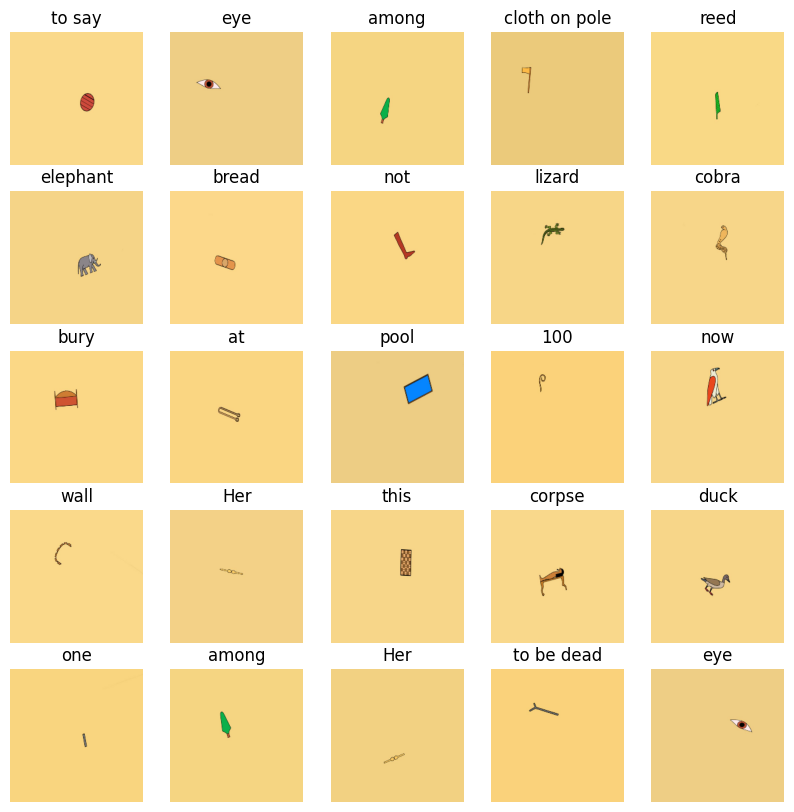

In [87]:
show_25_images(train_images, train_labels)

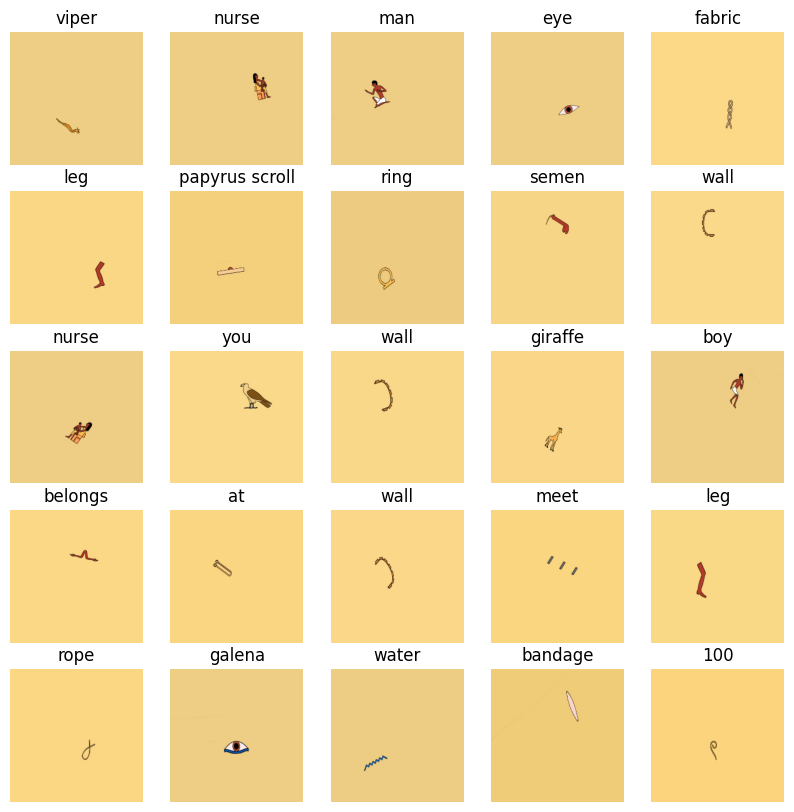

In [88]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

In [96]:
import tensorflow_hub as hub
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, color channels

# Setup ouput shape to the model
OUTPUT_SHAPE = len(unique_symbols)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5"

In [97]:
# Create a function which builds a keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building the model with: ", MODEL_URL)
  # Setup the mode layers
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url), #layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax") #layer 2 (output layer)
  ])
  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  # Build the Model
  model.build(INPUT_SHAPE)
  return model

In [99]:
model = create_model()
model.summary()

Building the model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1664)              3766048   
                                                                 
 dense (Dense)               (None, 95)                158175    
                                                                 
Total params: 3,924,223
Trainable params: 158,175
Non-trainable params: 3,766,048
_________________________________________________________________


In [100]:
#load TensorBoard notebook extension
%load_ext tensorboard

In [102]:
import datetime as dt
import os
log_file_path = "drive/MyDrive/doggo colab/logs"
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  #create a log director for storing TensorBoard logs
  logdir = os.path.join(log_file_path,
                        #make it so the logs get tracked whenever we run an experiment
                        dt.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [103]:
# Create Early Stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [104]:
NUM_EPOCHS = 100 #@param{type:"slider", min:10, max:100}

In [105]:
# Build a function to train and return a trained model
def train_model():
  #create a model
  model = create_model()

  # create a new tensorboard session everytime we train a model
  tensorboard_callback = create_tensorboard_callback()

  #fit the mode to the data passing it the callback we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, #once in a epochs
            callbacks=[tensorboard_callback, early_stopping]
            )
  return model

In [106]:
# Fit the mode to the data
model = train_model()

Building the model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5
Epoch 1/100
25/25 [==============================] - 16s 160ms/step - loss: 3.6509 - accuracy: 0.2887 - val_loss: 2.2372 - val_accuracy: 0.6150
Epoch 2/100
25/25 [==============================] - 2s 72ms/step - loss: 1.1971 - accuracy: 0.8612 - val_loss: 0.9531 - val_accuracy: 0.8700
Epoch 3/100
25/25 [==============================] - 2s 79ms/step - loss: 0.4742 - accuracy: 0.9563 - val_loss: 0.6088 - val_accuracy: 0.8800
Epoch 4/100
25/25 [==============================] - 2s 70ms/step - loss: 0.2685 - accuracy: 0.9762 - val_loss: 0.4749 - val_accuracy: 0.9050
Epoch 5/100
25/25 [==============================] - 2s 71ms/step - loss: 0.1889 - accuracy: 0.9800 - val_loss: 0.3970 - val_accuracy: 0.9100
Epoch 6/100
25/25 [==============================] - 2s 70ms/step - loss: 0.1387 - accuracy: 0.9887 - val_loss: 0.3588 - val_accuracy: 0.9250
Epoch 7/100
25/25 [=============================

In [107]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 60ms/step


array([[6.6736288e-06, 4.4230599e-04, 6.7958376e-06, ..., 3.3460290e-04,
        2.8808945e-04, 3.6566991e-05],
       [4.9380683e-06, 1.4938107e-05, 1.9991151e-03, ..., 6.2699546e-05,
        4.7815622e-05, 6.9924927e-04],
       [2.5236968e-06, 1.1469008e-07, 3.8663522e-05, ..., 1.7401322e-05,
        3.7924142e-06, 7.4222672e-04],
       ...,
       [3.6284950e-05, 1.1416564e-05, 1.5870819e-04, ..., 5.0695569e-05,
        1.3175578e-04, 3.8926917e-04],
       [6.0115536e-03, 7.2111568e-04, 1.1560547e-03, ..., 1.3733084e-03,
        5.4947664e-03, 1.9428466e-03],
       [1.6781761e-03, 1.9108786e-05, 4.2116520e-04, ..., 4.2375896e-04,
        5.5621378e-05, 1.4368362e-04]], dtype=float32)

In [109]:
# First Prediction
index = 42
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_symbols[np.argmax(predictions[index])]}")

[6.67362883e-06 4.42305987e-04 6.79583763e-06 9.68401253e-08
 1.23300580e-07 5.90579305e-07 2.73768705e-08 1.37925184e-07
 8.86124596e-08 1.96862693e-05 1.51971162e-05 1.20554840e-04
 2.12381198e-03 7.21486728e-08 2.35710081e-06 7.49348317e-07
 3.89301707e-03 2.51907210e-07 6.19453829e-07 1.85042904e-06
 6.20225782e-09 1.40342399e-06 2.76581814e-05 2.08060560e-03
 4.93964981e-05 1.42084555e-05 3.10731230e-05 7.04017111e-08
 5.46252340e-05 5.54734197e-06 1.18036985e-06 3.35416445e-07
 2.13420026e-06 9.06365822e-05 1.38371042e-05 4.91084284e-05
 5.21308721e-05 2.80899259e-09 2.06965456e-06 2.92499482e-08
 4.04832099e-06 1.12118919e-07 5.07694967e-05 1.28252822e-07
 2.23781331e-06 2.57836882e-06 1.79450160e-06 6.64309846e-06
 6.72120368e-05 8.18680974e-07 1.63172226e-05 1.93971224e-04
 3.24307148e-05 3.28541716e-07 3.80709309e-07 3.71706710e-06
 4.40729281e-07 1.89111040e-06 2.42462756e-05 2.38117218e-06
 1.10768333e-05 3.91627282e-07 4.14592272e-09 1.40106897e-06
 1.79763106e-06 7.489193

In [111]:
# Tuen prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """ turns an array of prediction_probabilities into a label """
  return unique_symbols[np.argmax(prediction_probabilities)]
# get a predictied label based on an array of prediction probabilities
index = 81
pred_label = get_pred_label(predictions[81])
pred_label

'mother'

In [113]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """ Takes a batched dataset of (images, label) tensor and returns separate arrays of images and labels."""
  images = []
  labels = []

  # Loop through batched data
  for image, label in val_data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_symbols[np.argmax(label)])
  return images, labels

# unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]


(array([[[0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         ...,
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866]],
 
        [[0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         ...,
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866]],
 
        [[0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         ...,
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866]],
 
        ...,
 
        [[0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156

In [114]:

images_ = []
labels_ = []

# Loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)
images_[0],labels_[0]

(array([[[0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         ...,
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866]],
 
        [[0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         ...,
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866]],
 
        [[0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         ...,
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156866]],
 
        ...,
 
        [[0.9333334 , 0.8078432 , 0.52156866],
         [0.9333334 , 0.8078432 , 0.52156

In [115]:
get_pred_label(labels_[0]),get_pred_label(predictions[0])

('viper', 'viper')

In [118]:
def plot_pred(prediciton_probabilities, labels, images, n=1):
  """ View the prediction, ground truth and image for sample n """
  pred_prob, true_label, image = prediciton_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  #plot the image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  # Change color based on prediction - correct:green, wrong:red
  color = "green" if pred_label == true_label else "red"
  # Change plot label
  plt.title("Predicted Symbol: {}-{:2.0f}%\nTrue Symbol: {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

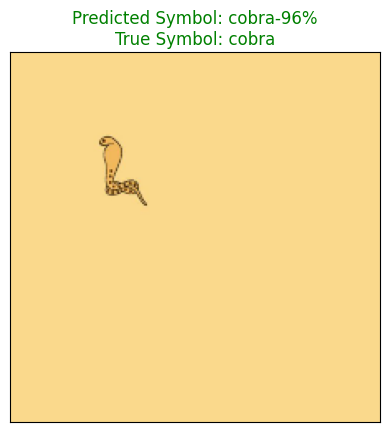

In [119]:
plot_pred(prediciton_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [123]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """ plot the top 10 highest prediction probabilities confidences along with the truth label for sample n"""
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the prediction probability label
  pred_label = get_pred_label(pred_prob)

  # find the top 10 prediciton confidencce indices
  top_10_pred_indices = pred_prob.argsort()[-10:][::-1]

  # find the top 10 prediciton confidencce values
  top_10_pred_values = pred_prob[top_10_pred_indices]

  # find the top 10 prediction labels
  top_10_pred_labels = unique_symbols[top_10_pred_indices]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), # X values - 10 bars
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels, #x labels needs to be the names of breeds(labels)
             rotation="vertical")
  # change the color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")

In [125]:
## playground to understand what's going on in the above function
top_10_prediction_indices = predictions[0].argsort()[-10:][::-1]
predictions[0][top_10_prediction_indices],predictions[0].max()

(array([9.8943347e-01, 3.8930171e-03, 2.1238120e-03, 2.0806056e-03,
        4.4230599e-04, 3.3460290e-04, 2.8808945e-04, 1.9397122e-04,
        1.7789516e-04, 1.2055484e-04], dtype=float32),
 0.98943347)

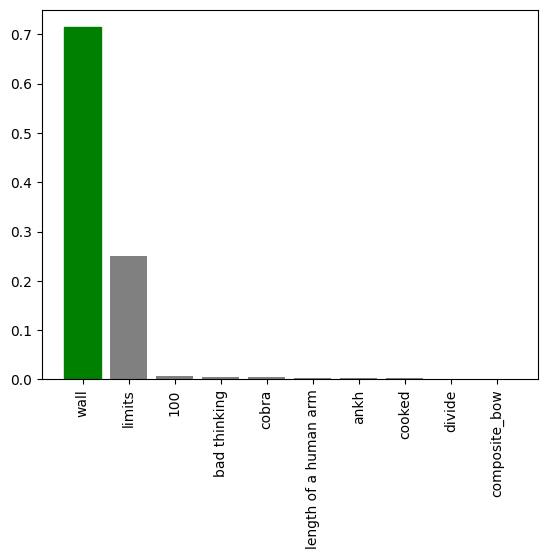

In [126]:
plot_pred_conf(prediction_probabilities=predictions, labels=val_labels, n=9)

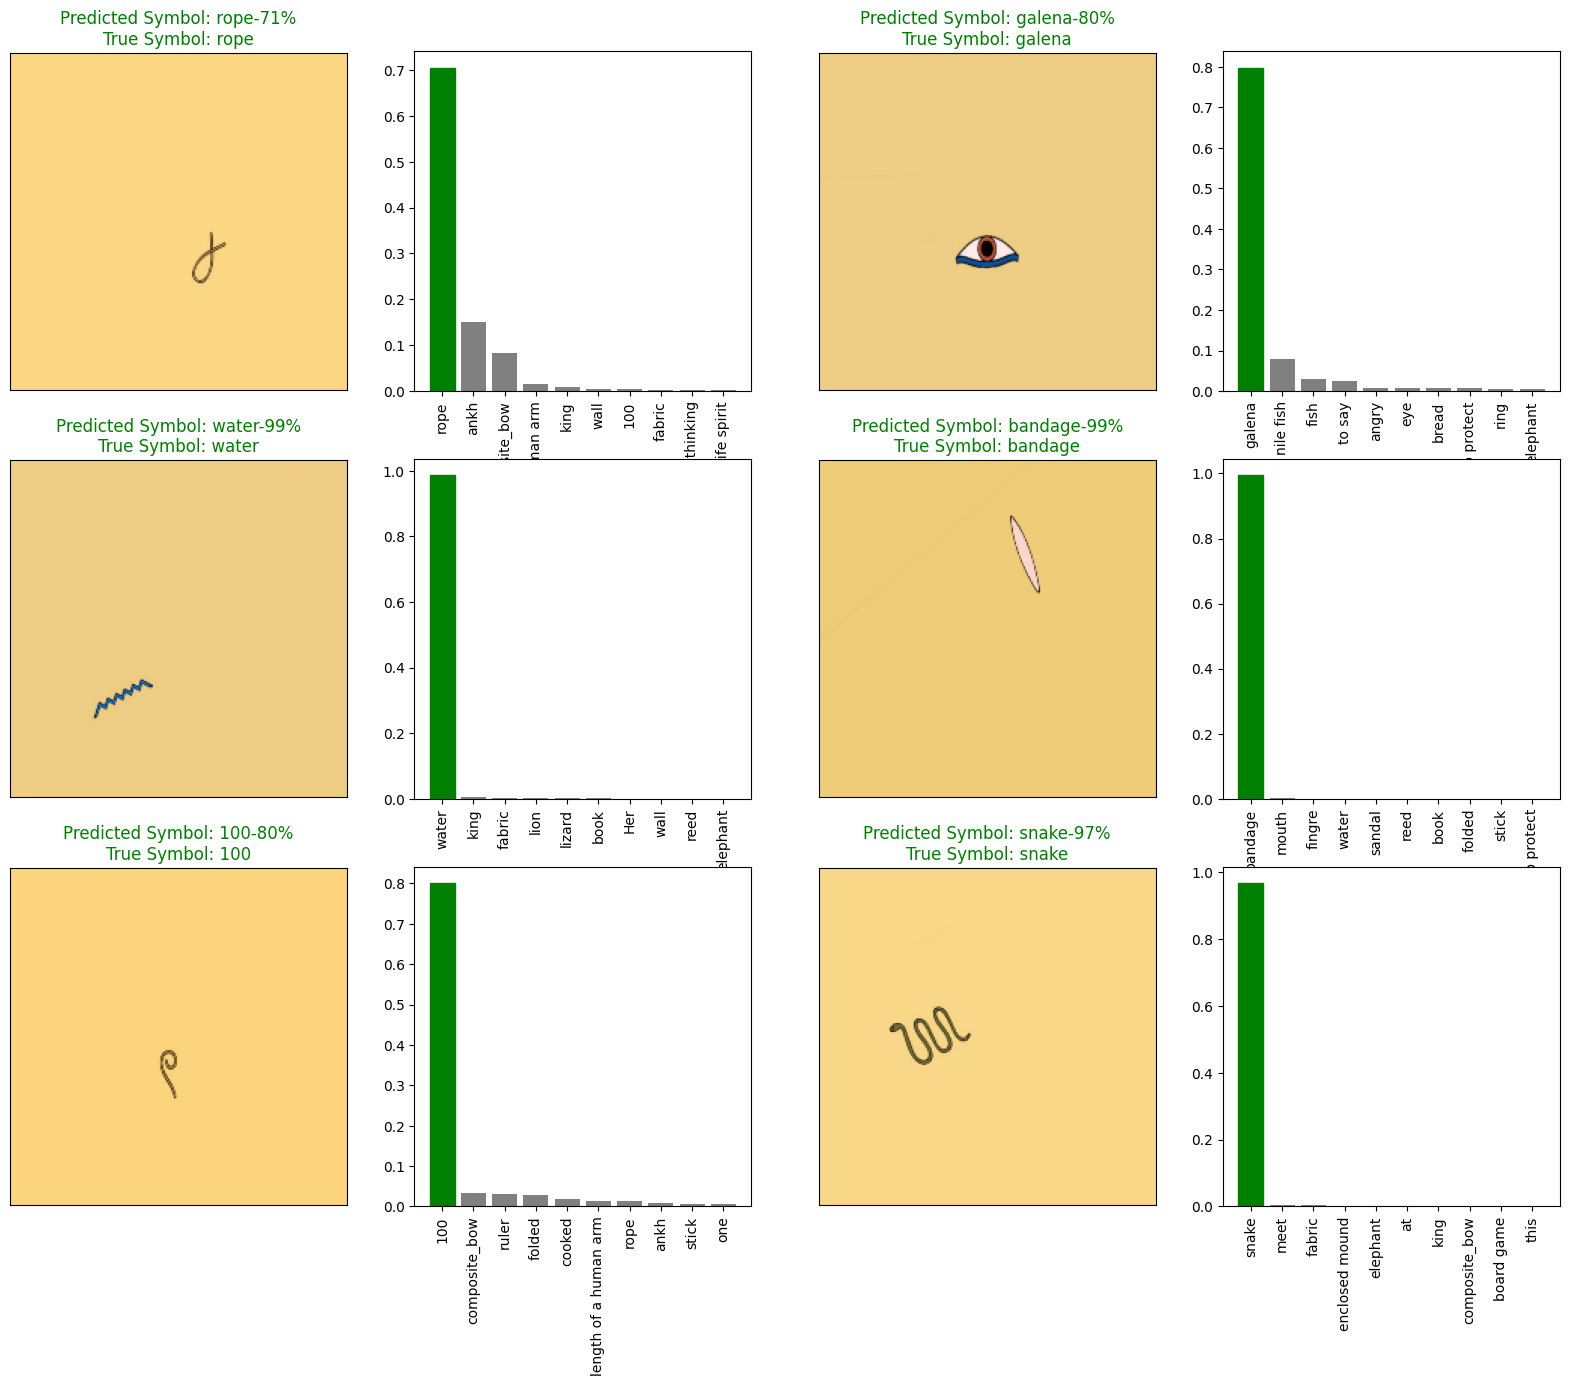

In [127]:
# Lets check out a few prediction and their different values

i_multiplier = 20
num_rows, num_cols = 3, 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediciton_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.show()

In [134]:
import datetime as dt
def save_model(model, suffix):
  """ Saves a given model in a modes directory and appends a suffix(string)"""
  model_dir = os.path.join("drive.google.com/file/d/1UD9YRO6IXkZWVmBBmnvU5FCV2Dn49skb/",
                           dt.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = model_dir + "-" + suffix + ".h5" # saving format of model
  print(f"Saving model to {model_path}...")
  model.save(model_path)
  return model_path

In [135]:
# Create a function load a trained model
import tensorflow as tf
import tensorflow_hub as hub
def load_model(model_path):
  """ Loads a save model from a specified path"""
  print(f"Loading save model from: {model_path}...")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [136]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetV2-Adam")

Saving model to drive.google.com/file/d/1UD9YRO6IXkZWVmBBmnvU5FCV2Dn49skb/20231109-14021699538558-1000-images-mobilenetV2-Adam.h5...


'drive.google.com/file/d/1UD9YRO6IXkZWVmBBmnvU5FCV2Dn49skb/20231109-14021699538558-1000-images-mobilenetV2-Adam.h5'

In [137]:
loaded_1000_image_model = load_model("drive.google.com/file/d/1UD9YRO6IXkZWVmBBmnvU5FCV2Dn49skb/20231109-14021699538558-1000-images-mobilenetV2-Adam.h5")
print("loaded model")

Loading save model from: drive.google.com/file/d/1UD9YRO6IXkZWVmBBmnvU5FCV2Dn49skb/20231109-14021699538558-1000-images-mobilenetV2-Adam.h5...
loaded model


In [138]:
# evaluated the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 0s 50ms/step - loss: 0.2944 - accuracy: 0.9250


[0.29440534114837646, 0.925000011920929]

In [140]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 0s 49ms/step - loss: 0.2944 - accuracy: 0.9250


[0.29440534114837646, 0.925000011920929]

In [141]:
len(X), len(y)

(3890, 3890)

In [142]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)
full_data

Creating training data batches...


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 95), dtype=tf.bool, name=None))>

In [143]:
# Create a model for full model
full_model = create_model()

Building the model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5


In [145]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we cant monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [146]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
122/122 [==============================] - 17s 99ms/step - loss: 1.3453 - accuracy: 0.7620
Epoch 2/100
122/122 [==============================] - 7s 54ms/step - loss: 0.1697 - accuracy: 0.9751
Epoch 3/100
122/122 [==============================] - 7s 53ms/step - loss: 0.1033 - accuracy: 0.9810
Epoch 4/100
122/122 [==============================] - 7s 53ms/step - loss: 0.0697 - accuracy: 0.9841
Epoch 5/100
122/122 [==============================] - 7s 56ms/step - loss: 0.0559 - accuracy: 0.9861
Epoch 6/100
122/122 [==============================] - 7s 60ms/step - loss: 0.0489 - accuracy: 0.9864
Epoch 7/100
122/122 [==============================] - 7s 53ms/step - loss: 0.0408 - accuracy: 0.9882
Epoch 8/100
122/122 [==============================] - 7s 53ms/step - loss: 0.0355 - accuracy: 0.9895
Epoch 9/100
122/122 [==============================] - 6s 53ms/step - loss: 0.0302 - accuracy: 0.9913
Epoch 10/100
122/122 [==============================] - 7s 56ms/step - loss: 0.02

In [147]:
save_model(full_model, "full-image-set-mobilenetV2-Adam")

Saving model to drive.google.com/file/d/1UD9YRO6IXkZWVmBBmnvU5FCV2Dn49skb/20231109-14091699538997-full-image-set-mobilenetV2-Adam.h5...


'drive.google.com/file/d/1UD9YRO6IXkZWVmBBmnvU5FCV2Dn49skb/20231109-14091699538997-full-image-set-mobilenetV2-Adam.h5'

In [150]:
loaded_full_model = load_model(model_path="drive.google.com/file/d/1UD9YRO6IXkZWVmBBmnvU5FCV2Dn49skb/20231109-14091699538997-full-image-set-mobilenetV2-Adam.h5")

Loading save model from: drive.google.com/file/d/1UD9YRO6IXkZWVmBBmnvU5FCV2Dn49skb/20231109-14091699538997-full-image-set-mobilenetV2-Adam.h5...


In [151]:
len(X)

3890

In [157]:
test_paths = []
for dirname, _, filenames in os.walk('/kaggle/input/egyptian-hieroglyphics-datasets/images/Test'):
    for filename in filenames:
        if filename.endswith(".jpg"):
            files.append(filename)
            test_paths.append(os.path.join(dirname, filename))
test_paths        

['/kaggle/input/egyptian-hieroglyphics-datasets/images/Test/100 (46).jpg',
 '/kaggle/input/egyptian-hieroglyphics-datasets/images/Test/pool(48).jpg',
 '/kaggle/input/egyptian-hieroglyphics-datasets/images/Test/you (49).jpg',
 '/kaggle/input/egyptian-hieroglyphics-datasets/images/Test/among(42).jpg',
 '/kaggle/input/egyptian-hieroglyphics-datasets/images/Test/occur (42).jpg',
 '/kaggle/input/egyptian-hieroglyphics-datasets/images/Test/cooked(42).jpg',
 '/kaggle/input/egyptian-hieroglyphics-datasets/images/Test/at (51).jpg',
 '/kaggle/input/egyptian-hieroglyphics-datasets/images/Test/owl(45).jpg',
 '/kaggle/input/egyptian-hieroglyphics-datasets/images/Test/to protect(50).jpg',
 '/kaggle/input/egyptian-hieroglyphics-datasets/images/Test/bury (49).jpg',
 '/kaggle/input/egyptian-hieroglyphics-datasets/images/Test/fabric(46).jpg',
 '/kaggle/input/egyptian-hieroglyphics-datasets/images/Test/divide (47).jpg',
 '/kaggle/input/egyptian-hieroglyphics-datasets/images/Test/angry(43).jpg',
 '/kaggle

In [158]:
# Create test data batch
test_data = create_data_batches(test_paths, test_data=True)

Creating test data batches...


In [159]:
 # Make prediction on test data bathc using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                              verbose=1)

33/33 [==============================] - 4s 114ms/step


In [160]:
np.savetxt("drive.google.com/file/d/1UD9YRO6IXkZWVmBBmnvU5FCV2Dn49skb/test_preds_array.csv", test_predictions, delimiter=',')

In [161]:
test_predictions.shape

(1049, 95)

In [176]:
!conda install -y gdown

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.3
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.13.1            |     pyhd8ed1ab_0          15 KB  conda-forge
    gdown-4.7.1                |     pyhd8ed1ab_0          19 KB  conda-forge
    openssl-3.1.4              |       hd590300_0         2.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.6 MB

The following NEW packages will be INS

In [179]:
!gdown --id 1jzYEj0ziQefXpOn47RehJnjFHWB5J7VL

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jzYEj0ziQefXpOn47RehJnjFHWB5J7VL
To: /kaggle/working/images.jpg
100%|██████████████████████████████████████| 8.29k/8.29k [00:00<00:00, 33.8MB/s]


In [180]:
!gdown --id 1UXzlYpyuO7EF5KEKac1AmLnmho3jQ-hd

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UXzlYpyuO7EF5KEKac1AmLnmho3jQ-hd
To: /kaggle/working/Eye-Of-Ra.jpg
100%|██████████████████████████████████████| 37.2k/37.2k [00:00<00:00, 78.6MB/s]


In [181]:
!gdown --id 1M_aOxf7ssNwNi5zhhOKknMOw0UyPpuHZ

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1M_aOxf7ssNwNi5zhhOKknMOw0UyPpuHZ
To: /kaggle/working/download.jpg
100%|██████████████████████████████████████| 8.91k/8.91k [00:00<00:00, 43.0MB/s]


In [187]:
!gdown https://drive.google.com/drive/folders/1SkMQSUL1YRzCbc9n4RH8xNOHLlXzMXq1?usp=sharing

/opt/conda/lib/python3.10/site-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1SkMQSUL1YRzCbc9n4RH8xNOHLlXzMXq1?usp=sharing
To: /kaggle/working/1SkMQSUL1YRzCbc9n4RH8xNOHLlXzMXq1?usp=sharing
266kB [00:00, 673MB/s]


In [192]:
import os

custom_path = "drive.google.com/drive/folders/1SkMQSUL1YRzCbc9n4RH8xNOHLlXzMXq1/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]
custom_image_paths

FileNotFoundError: [Errno 2] No such file or directory: 'drive.google.com/drive/folders/1SkMQSUL1YRzCbc9n4RH8xNOHLlXzMXq1/'